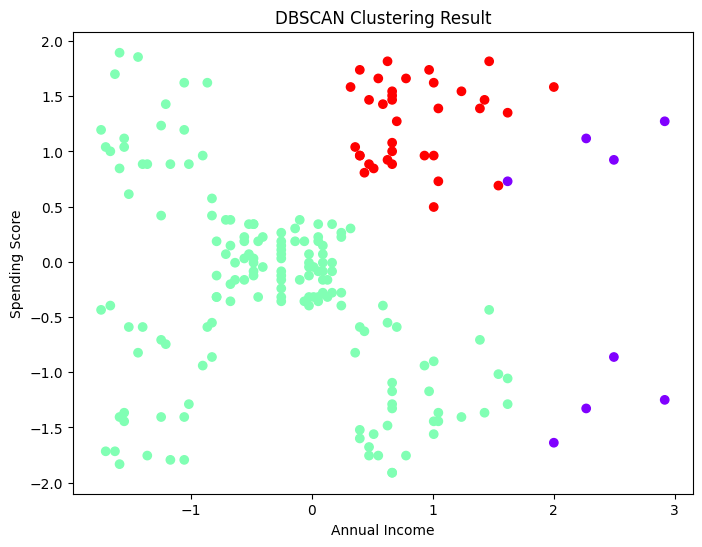

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [13]:
# DBSCAN CLUSTERING - COMPLETE NOTEBOOK CELL (WITH FILE PATH)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pickle

# 1. Load Dataset (YOUR PATH)
df = pd.read_csv(r"C:\Users\sachin-selvam\Desktop\task_11\Mall_Customers (3).csv")

# 2. Select Features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 3. Scale Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Create DBSCAN Model
dbscan_model = DBSCAN(eps=0.5, min_samples=5)

# 5. Fit Model
dbscan_model.fit(X_scaled)

# 6. Assign Clusters
df['Cluster'] = dbscan_model.labels_

# 7. Save Model and Scaler (same folder as notebook)
with open("dbscan_model.pkl", "wb") as f:
    pickle.dump(dbscan_model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# 8. Visualization
plt.figure(figsize=(8,6))
plt.scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    c=df['Cluster'],
    cmap='rainbow'
)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("DBSCAN Clustering Result")
plt.show()

# 9. Output Preview
df.head()
